In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install underthesea
!pip install dill

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 64.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 525.0 kB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import seaborn as sns
import warnings
import pickle
import tensorflow as tf
import dill
import wordcloud
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from wordcloud import WordCloud
from underthesea import sent_tokenize,word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from keras.models import load_model
set_config(display='diagram')

In [4]:
print(tf.__version__)

2.12.0


In [5]:
df = pd.read_csv("/content/drive/MyDrive/HK8/DACN2/Colab/DataCleaned/TongHop.csv")
df

,content,label
0,"Từ đầu tháng 4/2023 đến nay , một số khu vực ở...",1
1,"Qua xác minh , Trung tâm Xử lý tin giả Việt Na...",1
2,"Qua tiếp nhận phản ánh và tiến hành xác minh ,...",1
3,"Qua công tác rà soát và tiếp nhận thông tin , ...",1
4,Trung tâm Xử lý Tin giả Việt Nam ( VAFC ) phát...,1
...,...,...
5172,Phó Thủ tướng yêu cầu Ủy ban nhân dân tỉnh Quả...,0
5173,"Theo Báo Khánh Hòa , chiều 13/4 , ông Nguyễn S...",0
5174,Mục đích của việc tổng kết thi hành Luật Hòa g...,0
5175,"Theo Cục Cảnh sát Phòng cháy , chữa cháy và Cứ...",0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  5177 non-null   object
 1   label    5177 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 81.0+ KB


In [7]:
df.label.value_counts()

0    4254
1     923
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

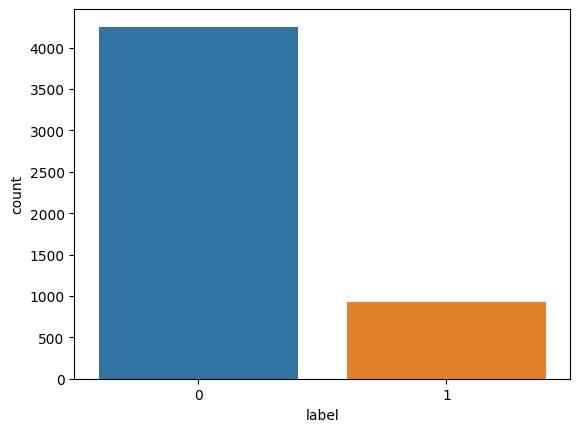

In [8]:
sns.countplot(x='label', data=df)

In [9]:
def split_word(x):return len(x.split())
len_text = df['content'].apply(split_word)
len_text


0       1111
1        286
2        213
3        110
4        204
        ... 
5172     333
5173     521
5174     814
5175    1224
5176    1136
Name: content, Length: 5177, dtype: int64

In [10]:
len_text.describe()

count    5177.000000
mean      715.751787
std       450.665098
min        17.000000
25%       386.000000
50%       657.000000
75%      1007.000000
max      2090.000000
Name: content, dtype: float64

In [11]:
x = df['content']
y = df['label']

train_X_df, val_X_df, train_Y_sr, val_Y_sr = train_test_split(
    x, y,
    test_size = 0.2,
    stratify = y
)

In [12]:
train_X_df

4225    Thực hiện Công điện số 05 / CĐ-TTg ngày 8/1/20...
48      Thông điệp của bức tranh mang tên là : “ Khải ...
2225    Tối 10/3 , Phó Thủ tướng Trần Lưu Quang dự lễ ...
3341    Đây là sự kiện xúc tiến đầu tư quốc tế duy nhấ...
1774    Bản danh sách này được rút gọn từ danh sách 25...
                              ...                        
2369    Theo đó tại Quảng Bình , Dự án xây dựng công t...
4437    Văn phòng Chính phủ vừa ban hành Thông báo số ...
2316    Đối với nền kinh tế ngày nay , có hai lĩnh vực...
260     trong khi cả nước đang có rất nhiều tấm lòng t...
3048    Tham dự buổi lễ có các Ủy viên Bộ Chính trị : ...
Name: content, Length: 4141, dtype: object

In [13]:
val_X_df

1364    Tại Quảng Bình , chiều ngày 5/7 , ông Vũ Đại T...
2605    Với 10 năm quan hệ đối tác toàn diện , nhiều h...
3649    Du lịch văn hóa là một trong 13 ngành công ngh...
464     “ Chính phủ Nga chính thức công bố : Virus viê...
1481    Trong chuyến tập huấn tại Tây Á chuẩn bị cho v...
                              ...                        
1961    Trong số 31 cầu thủ , phần lớn vẫn là những cá...
1902    Thông tư quy định về nội dung , chương trình t...
4216    Theo TS.BS. Nguyễn Trung Nguyên , Giám đốc Tru...
2209    Nhiều áp lực ảnh hưởng tăng trưởng Bà Dorsati ...
759     Đức từ chối cấp Visa cho đoàn công tác nhà nướ...
Name: content, Length: 1036, dtype: object

In [14]:
with open("/content/drive/MyDrive/DACN/vn-stopword.txt",encoding='utf-8') as file:
    stopwords = file.readlines()
    stopwords = [word.rstrip() for word in stopwords]

punctuations = '''!()-–=[]{}“”‘’;:'"|\,<>./?@#$%^&*_~'''

special_chars = ['\n', '\t']

regex = re.compile(
        r'^(?:http|ftp)s?://' # http:// or https://
        r'(?:(?:[A-Z0-9](?:[A-Z0-9-]{0,61}[A-Z0-9])?\.)+(?:[A-Z]{2,6}\.?|[A-Z0-9-]{2,}\.?)|' # domain
        r'localhost|' # localhost
        r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})' # ip
        r'(?::\d+)?' # port
        r'(?:/?|[/?]\S+)$', re.IGNORECASE)

In [15]:
def tokenize(text):
    tokenized_text = word_tokenize(text)
    return tokenized_text

def is_punctuation(token):
    global punctuations
    return True if token in punctuations else False

def is_special_chars(token):
    global special_chars
    return True if token in special_chars else False

def is_link(token):
    return re.match(regex, token) is not None

def lowercase(token):
    return token.lower()

def is_stopword(token):
    global stopwords
    return True if token in stopwords else False
def vietnamese_text_preprocessing(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if not is_punctuation(token)]
    tokens = [token for token in tokens if not is_special_chars(token)]
    tokens = [token for token in tokens if not is_link(token)]
    tokens = [lowercase(token) for token in tokens]
    tokens = [token for token in tokens if not is_stopword(token)]
    return tokens

In [16]:
demo_vi = '"Cuộc điều tra đang diễn ra và chúng ta cần chờ kết quả cuối cùng. Nhưng chúng tôi không thấy dấu hiệu nào cho thấy đây là cuộc tấn công có chủ ý. Phân tích sơ bộ cho thấy sự việc nhiều khả năng do tên lửa phòng không Ukraine bắn ra để bảo vệ lãnh thổ Ukraine trước các cuộc tấn công bằng tên lửa hành trình Nga", Tổng thư ký NATO Stoltenberg nói ngày 16/11.'

demo_text_to_tokens = vietnamese_text_preprocessing(demo_vi)
print(demo_text_to_tokens)

['điều tra', 'diễn', 'chờ', 'kết quả', 'dấu hiệu', 'tấn công', 'chủ ý', 'phân tích', 'sơ bộ', 'khả năng', 'lửa', 'phòng', 'ukraine', 'bắn', 'bảo vệ', 'lãnh thổ', 'ukraine', 'tấn công', 'lửa', 'hành trình', 'nga', 'tổng thư ký', 'nato stoltenberg', '16/11']


In [17]:
fake_news_df = df[df['label'] == 1]
real_news_df = df[df['label'] == 0]

In [18]:
def visulize_frequency_word(df):
    words_df = []
    df['content'].apply(lambda x: words_df.extend(vietnamese_text_preprocessing(x)))
    wordcloud = WordCloud(width= 800, height= 600,max_font_size = 80,background_color="white").generate(' '.join(words_df))
    plt.figure(figsize=(10,10), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

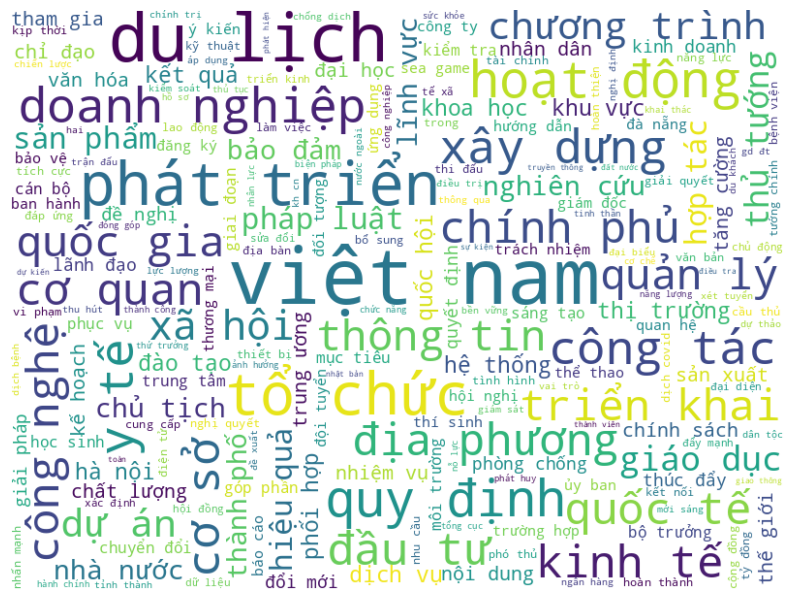

In [19]:
visulize_frequency_word(real_news_df)

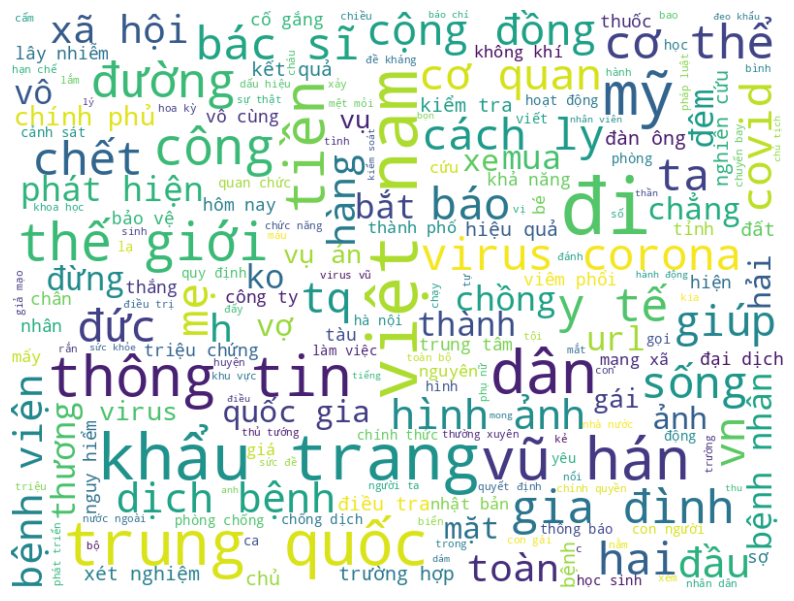

In [20]:
visulize_frequency_word(fake_news_df)

In [ ]:
train_X_df = [' '.join(vietnamese_text_preprocessing(sent)) for sent in train_X_df]
val_X_df = [' '.join(vietnamese_text_preprocessing(sent)) for sent in val_X_df]

In [ ]:
tfvect = TfidfVectorizer(max_df=0.7)
tfid_x_train = tfvect.fit_transform(train_X_df)
tfid_x_test = tfvect.transform(val_X_df)

In [ ]:
def decision_tree(X_train, X_test, y_train):
  tree = DecisionTreeClassifier(random_state=0)
  tree.fit(X_train, y_train)
  y_pred_tree = tree.predict(X_test)
  return y_pred_tree, tree
def svc(X_train, X_test, y_train):
  clf_svc = svm.LinearSVC()
  clf_svc.fit(X_train, y_train)
  y_pred_svc = clf_svc.predict(X_test)
  return y_pred_svc, clf_svc
def naivebayes(X_train, X_test, y_train):
  nb = MultinomialNB()
  nb.fit(X_train, y_train)
  y_pred_nb = nb.predict(X_test)
  return y_pred_nb, nb

In [ ]:
pred1_svc, model1_svc = svc(tfid_x_train, tfid_x_test, train_Y_sr)
pred1_tree, model1_tree = decision_tree(tfid_x_train, tfid_x_test, train_Y_sr)
pred1_nb, model1_nb = naivebayes(tfid_x_train, tfid_x_test, train_Y_sr)
def evaluate(pred, true):
  acc = accuracy_score(pred, true)
  print(classification_report(pred, true))
  print('Accuracy:', acc)
  auc = roc_auc_score(true, pred)
  print('AUC:', auc)
  print('-----------------------------------------------------')
  print()
  return acc, auc

print('SVC:')
acc1_svc, auc1_svc = evaluate(pred1_svc, val_Y_sr)
print('Decision Tree:')
acc1_tree, auc1_tree = evaluate(pred1_tree, val_Y_sr)
print('Naive Bayes:')
acc1_nb, auc1_nb = evaluate(pred1_nb, val_Y_sr)

SVC:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       861
           1       0.92      0.98      0.95       175

    accuracy                           0.98      1036
   macro avg       0.96      0.98      0.97      1036
weighted avg       0.98      0.98      0.98      1036

Accuracy: 0.9826254826254827
AUC: 0.9598119858989423
-----------------------------------------------------

Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       868
           1       0.82      0.90      0.86       168

    accuracy                           0.95      1036
   macro avg       0.90      0.93      0.92      1036
weighted avg       0.96      0.95      0.95      1036

Accuracy: 0.9527027027027027
AUC: 0.9014101057579318
-----------------------------------------------------

Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.86      0.9

In [ ]:
out_tfidf = open("/content/drive/MyDrive/HK8/DACN2/Colab/19.4.23/tfidf_vector.pkl",mode = "wb")
dill.dump(tfvect,out_tfidf)
out_tfidf.close()

In [ ]:
out_svc = open("/content/drive/MyDrive/HK8/DACN2/Colab/19.4.23/svc-model.pkl",mode = "wb")
dill.dump(model1_svc,out_svc)
out_svc.close()

In [ ]:
out_nb = open("/content/drive/MyDrive/HK8/DACN2/Colab/19.4.23/nb-model.pkl",mode = "wb")
dill.dump(model1_nb,out_nb)
out_nb.close()

In [ ]:
out_tree = open("/content/drive/MyDrive/HK8/DACN2/Colab/19.4.23/tree-model.pkl",mode = "wb")
dill.dump(model1_tree,out_tree)
out_tree.close()

In [ ]:
with open('/content/drive/MyDrive/HK8/DACN2/Colab/19.4.23/svc-model.pkl', 'rb') as in_strm:
    saved_svc_model = dill.load(in_strm)
with open('/content/drive/MyDrive/HK8/DACN2/Colab/19.4.23/nb-model.pkl', 'rb') as in_strm:
    saved_nb_model = dill.load(in_strm)
with open('/content/drive/MyDrive/HK8/DACN2/Colab/19.4.23/tree-model.pkl', 'rb') as in_strm:
    saved_tree_model = dill.load(in_strm)
with open('/content/drive/MyDrive/HK8/DACN2/Colab/19.4.23/tfidf_vector.pkl', 'rb') as in_strm:
    saved_tfidf = dill.load(in_strm)

text = ' '.join(vietnamese_text_preprocessing('Quận 12 thông báo tiêm vắc xin Trung Quốc dân bỏ về hết'))
text_real = ' '.join(vietnamese_text_preprocessing('EVNNPC vừa có văn bản yêu cầu các đơn vị trực thuộc về việc đảm bảo vận hành an toàn hệ thống điện, cung cấp điện ổn định, tin cậy phục vụ các hoạt động chính trị, văn hóa, xã hội của nhân dân trong dịp Giỗ Tổ Hùng Vương, Ngày 30/4 và Ngày Quốc tế lao động 1/5/2023. Theo đó, EVNNPC yêu cầu các đơn vị lập và thực hiện tốt phương án đảm bảo cung ứng điện trong thời gian nói trên.'))
pd_pred = pd.DataFrame()
# tfid_text = saved_tfidf.transform([text])
tfid_text_real = saved_tfidf.transform([text])
print('Naive Bayes predict: ')
pred_result_nb = saved_nb_model.predict(tfid_text_real)[0]
print(pred_result_nb)
print('Decision Tree predict: ')
pred_result_tree = saved_tree_model.predict(tfid_text_real)[0]
print(pred_result_tree)
print('SVC predict: ')
pred_result_svc = saved_svc_model.predict(tfid_text_real)[0]
print(pred_result_svc)

Naive Bayes predict: 
0
Decision Tree predict: 
1
SVC predict: 
1


In [ ]:
max_vocab = 30000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(train_X_df)

In [ ]:
# tokenize the text into vectors
X_train = tokenizer.texts_to_sequences(train_X_df)
X_test = tokenizer.texts_to_sequences(val_X_df)

In [ ]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [ ]:
with open('/content/drive/MyDrive/HK8/DACN2/Colab/19.4.23/tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          960000    
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 128)        49664     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, train_Y_sr, epochs=20,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])
# history = model.fit(X_train, train_Y_sr, epochs=20,validation_split=0.1, batch_size=30, shuffle=True)

Epoch 1/20
125/125 [==============================] - 52s 271ms/step - loss: 0.5509 - accuracy: 0.8218 - val_loss: 0.2644 - val_accuracy: 0.8217
Epoch 2/20
125/125 [==============================] - 19s 154ms/step - loss: 0.2539 - accuracy: 0.8854 - val_loss: 0.2097 - val_accuracy: 0.9470
Epoch 3/20
125/125 [==============================] - 15s 118ms/step - loss: 0.2093 - accuracy: 0.9436 - val_loss: 0.1565 - val_accuracy: 0.9590
Epoch 4/20
125/125 [==============================] - 15s 124ms/step - loss: 0.1312 - accuracy: 0.9611 - val_loss: 0.1089 - val_accuracy: 0.9614
Epoch 5/20
125/125 [==============================] - 10s 80ms/step - loss: 0.0853 - accuracy: 0.9753 - val_loss: 0.1346 - val_accuracy: 0.9614
Epoch 6/20
125/125 [==============================] - 8s 66ms/step - loss: 0.0928 - accuracy: 0.9767 - val_loss: 0.0854 - val_accuracy: 0.9687
Epoch 7/20
125/125 [==============================] - 9s 74ms/step - loss: 0.0599 - accuracy: 0.9801 - val_loss: 0.0801 - val_accurac

In [ ]:
model.evaluate(X_test, val_Y_sr)

33/33 [==============================] - 1s 18ms/step - loss: 0.0826 - accuracy: 0.9788


[0.08258888870477676, 0.9787644743919373]

In [ ]:
pred = model.predict(X_test)
binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

33/33 [==============================] - 2s 13ms/step


In [ ]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, val_Y_sr))
print('Precision on testing set:', precision_score(binary_predictions, val_Y_sr))
print('Recall on testing set:', recall_score(binary_predictions, val_Y_sr))

Accuracy on testing set: 0.9787644787644788
Precision on testing set: 0.9027027027027027
Recall on testing set: 0.9766081871345029


In [ ]:
model.save("/content/drive/MyDrive/HK8/DACN2/Colab/19.4.23/rnn-model_final.h5")

In [ ]:
model_saved = load_model("/content/drive/MyDrive/HK8/DACN2/Colab/19.4.23/rnn-model_final.h5")

In [ ]:
with open('/content/drive/MyDrive/HK8/DACN2/Colab/19.4.23/tokenizer.pkl', 'rb') as handle:
    tokenizer_saved = pickle.load(handle)

In [ ]:
text = ' '.join(vietnamese_text_preprocessing('EVNNPC vừa có văn bản yêu cầu các đơn vị trực thuộc về việc đảm bảo vận hành an toàn hệ thống điện, cung cấp điện ổn định, tin cậy phục vụ các hoạt động chính trị, văn hóa, xã hội của nhân dân trong dịp Giỗ Tổ Hùng Vương, Ngày 30/4 và Ngày Quốc tế lao động 1/5/2023. Theo đó, EVNNPC yêu cầu các đơn vị lập và thực hiện tốt phương án đảm bảo cung ứng điện trong thời gian nói trên.'))
# Predict
X_test_text = tokenizer_saved.texts_to_sequences([text])
X_test_text = tf.keras.preprocessing.sequence.pad_sequences(X_test_text, padding='post', maxlen=256)
pred_text = model_saved.predict(X_test_text)[0][0]
pred_text

1/1 [==============================] - 1s 1s/step


-3.9461482

In [ ]:
text = ' '.join(vietnamese_text_preprocessing('Quận 12 thông báo tiêm vắc xin Trung Quốc, dân bỏ về hết'))
# Predict
X_test_text = tokenizer_saved.texts_to_sequences([text])
X_test_text = tf.keras.preprocessing.sequence.pad_sequences(X_test_text, padding='post', maxlen=256)
pred_text = model_saved.predict(X_test_text)[0][0]
pred_text

1/1 [==============================] - 0s 32ms/step


3.9395657